# Importing Libraries

In [1]:
import pandas as pd

iteration_numbers = []
cluster_numbers = []
models = []
rmses = []

# With Clustering

## Making Dataframe

In [2]:

# Read the text file
with open('RMSE.txt', 'r') as file:
    iteration_number = 1
    cluster_number = 1
    for line in file:
        line = line.strip()
        if line.startswith('Model_name:'):
            model_name = line.split(': ')[1]
        elif line.startswith('Average RMSE'):
            rmse = float(line.split(': ')[1])
            # Append data to lists
            iteration_numbers.append(iteration_number)
            cluster_numbers.append(cluster_number)
            models.append(model_name)
            rmses.append(rmse)
            # Increment cluster number
            if len(models) % 6 == 0:
                cluster_number += 1
            # Increment iteration number and reset cluster number after processing all clusters
            if len(models) % 36 == 0:
                iteration_number += 1
                cluster_number = 1

# Create DataFrame
df = pd.DataFrame({
    'Iteration': iteration_numbers,
    'Cluster': cluster_numbers,
    'Model': models,
    'RMSE': rmses
})


## Plotting Box Plot

<ipython-input-3-c941967dba22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Model', x='RMSE', palette='husl')


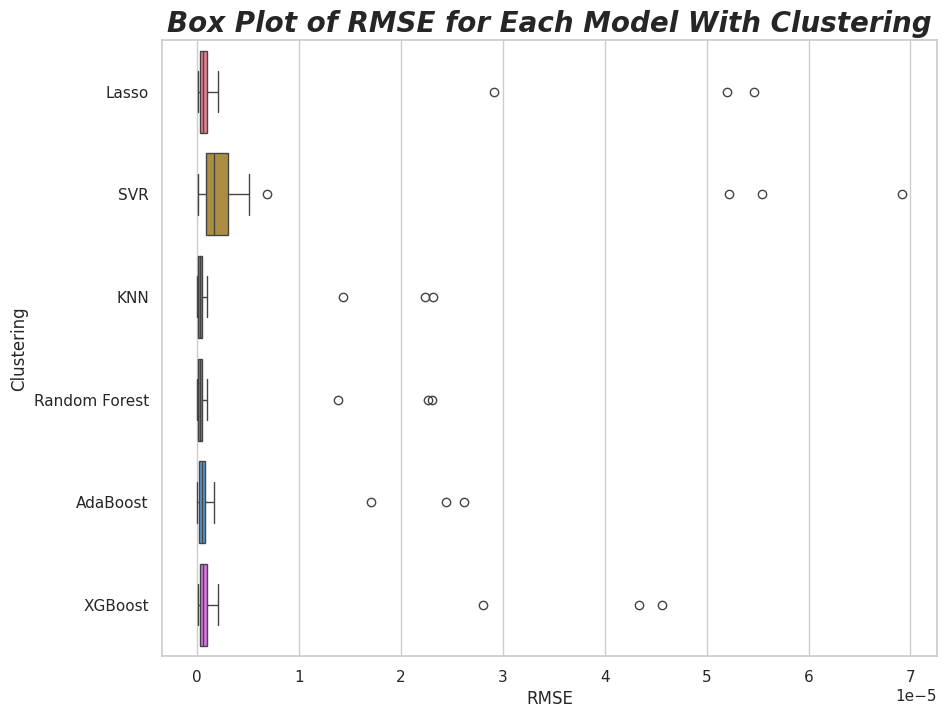

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Model', x='RMSE', palette='husl')
plt.title('Box Plot of RMSE for Each Model With Clustering',fontsize=20,fontweight='bold',fontstyle='italic')
plt.xlabel('RMSE')
plt.ylabel('Clustering')
plt.savefig('Box_plot_with_Clustering.png')
plt.show()


# Without Clustering

In [4]:
import pandas as pd

# Initialize lists to store data
iteration_numbers = []
cluster_numbers = []
models = []
rmses = []

# Read the text file
with open('no_clustering_data.txt', 'r') as file:
    iteration_number = 1
    cluster_number = 1
    for line in file:
        line = line.strip()
        if line.startswith('Model_name(no clustering):'):
            model_name = line.split(': ')[1]
        elif line.startswith('Average RMSE'):
            rmse = float(line.split(': ')[1])
            # Append data to lists
            iteration_numbers.append(iteration_number)
            cluster_numbers.append(cluster_number)
            models.append(model_name)
            rmses.append(rmse)
            # Increment cluster number
            if len(models) % 6 == 0:
                cluster_number += 1
            # Increment iteration number and reset cluster number after processing all clusters
            if len(models) % 36 == 0:
                iteration_number += 1
                cluster_number = 1

# Create DataFrame
df_no_cluster = pd.DataFrame({
    'Iteration': iteration_numbers,
    'Cluster': cluster_numbers,
    'Model': models,
    'RMSE': rmses
})



<ipython-input-5-2b4494008af2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_cluster, y='Model', x='RMSE', palette='husl')


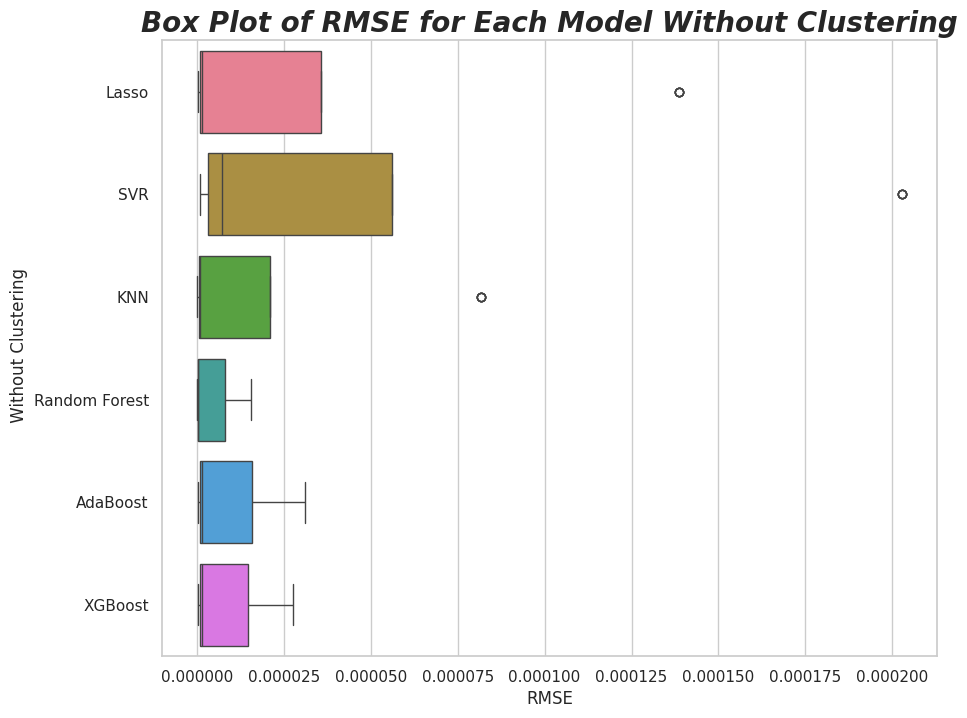

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_no_cluster, y='Model', x='RMSE', palette='husl')
plt.title('Box Plot of RMSE for Each Model Without Clustering',fontsize=20,fontweight='bold',fontstyle='italic')
plt.xlabel('RMSE')
plt.ylabel(' Without Clustering')
plt.savefig('Box_plot_without_clustering.png')
plt.show()


# Combined Plot

<ipython-input-14-58de69e7409b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Model', x='RMSE', palette='husl', ax=axs[0])
<ipython-input-14-58de69e7409b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_cluster, y='Model', x='RMSE', palette='husl', ax=axs[1])


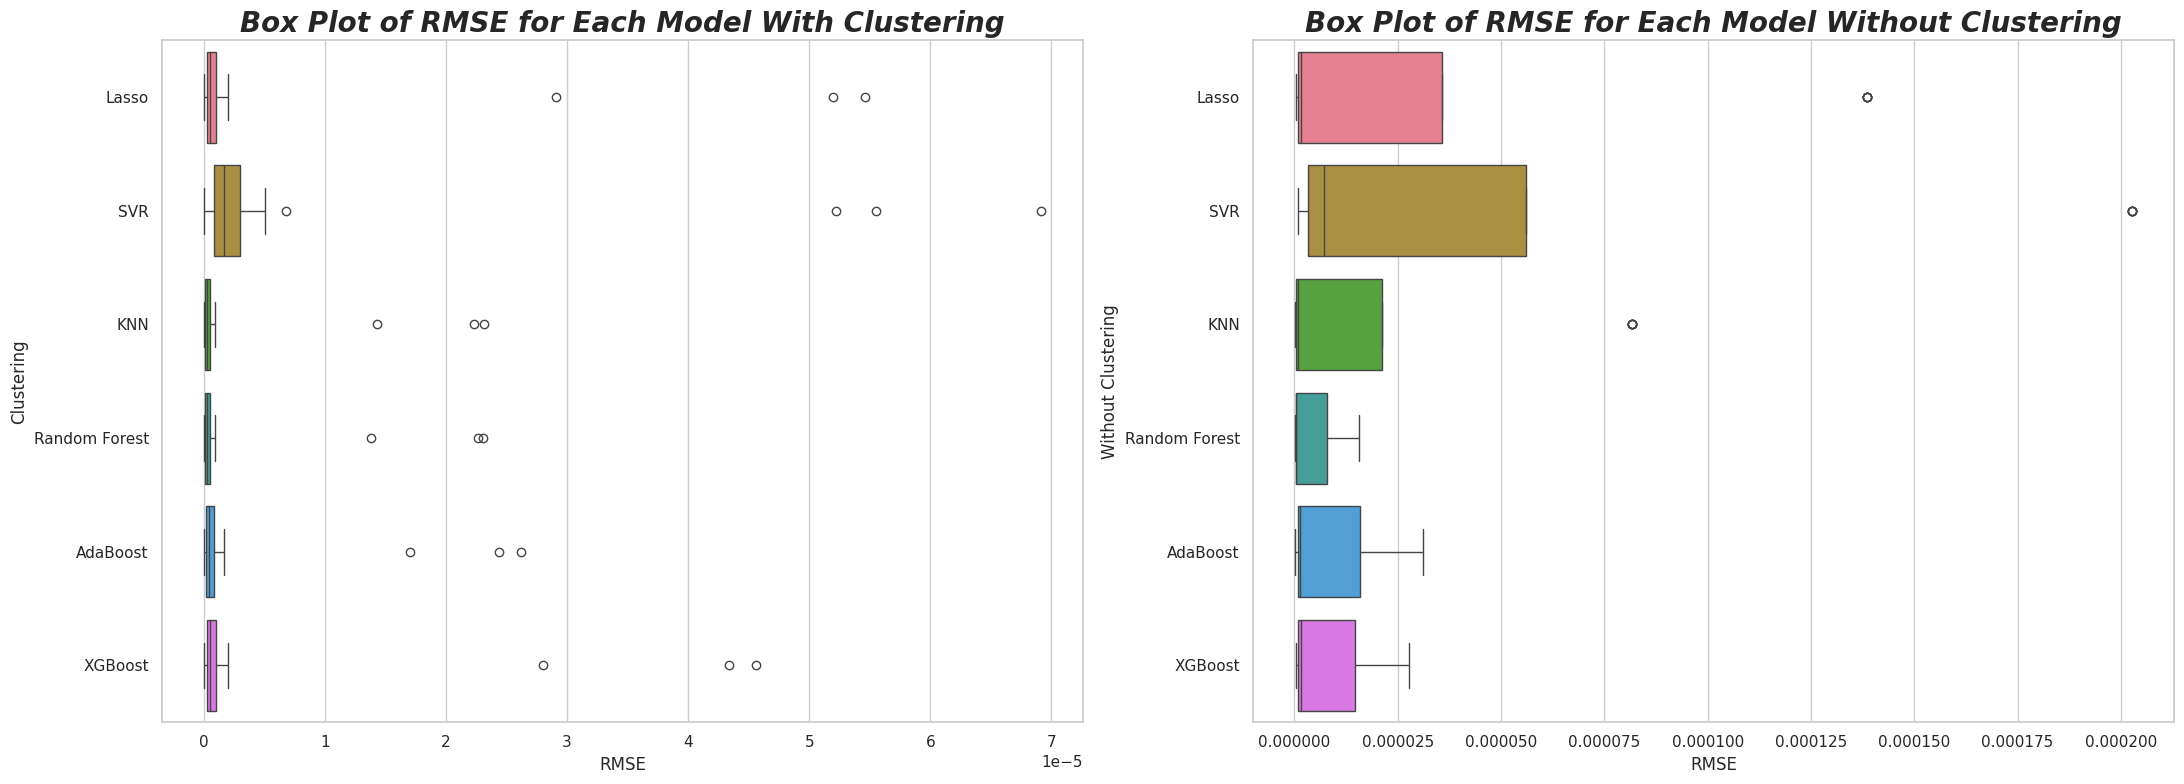

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(22, 8))

# Plot the box plot for data with clustering
sns.boxplot(data=df, y='Model', x='RMSE', palette='husl', ax=axs[0])
axs[0].set_title('Box Plot of RMSE for Each Model With Clustering', fontsize=20, fontweight='bold', fontstyle='italic')
axs[0].set_xlabel('RMSE')
axs[0].set_ylabel('Clustering')

# Adjust the appearance of the boxplot components after creation
for box in axs[0].artists:
    box.set_linewidth(2.5)
    box.set_edgecolor('black')

# Plot the box plot for data without clustering
sns.boxplot(data=df_no_cluster, y='Model', x='RMSE', palette='husl', ax=axs[1])
axs[1].set_title('Box Plot of RMSE for Each Model Without Clustering', fontsize=20, fontweight='bold', fontstyle='italic')
axs[1].set_xlabel('RMSE')
axs[1].set_ylabel('Without Clustering')

# Adjust the appearance of the boxplot components after creation
for box in axs[1].artists:
    box.set_linewidth(2.5)
    box.set_edgecolor('black')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('Box_plots_side_by_side.png')
plt.show()


# Tabulating Stats

In [11]:
from tabulate import tabulate

# Calculate mean and standard deviation for models with clustering
model_stats_with_clustering = df.groupby('Model')['RMSE'].agg(['mean', 'std']).reset_index()
model_stats_with_clustering.columns = ['Model', 'Mean with Clustering', 'Std with Clustering']

# Calculate mean and standard deviation for models without clustering
model_stats_without_clustering = df_no_cluster.groupby('Model')['RMSE'].agg(['mean', 'std']).reset_index()
model_stats_without_clustering.columns = ['Model', 'Mean without Clustering', 'Std without Clustering']

# Merge the two DataFrames on the 'Model' column
model_stats_combined = model_stats_with_clustering.merge(model_stats_without_clustering, on='Model', how='outer')

# Set NaN values to '-' for better presentation
model_stats_combined.fillna('-', inplace=True)

# Print the tabulated statistics side by side
print(tabulate(model_stats_combined, headers='keys', tablefmt='pretty'))


+---+---------------+------------------------+------------------------+-------------------------+------------------------+
|   |     Model     |  Mean with Clustering  |  Std with Clustering   | Mean without Clustering | Std without Clustering |
+---+---------------+------------------------+------------------------+-------------------------+------------------------+
| 0 |   AdaBoost    | 2.763856746384353e-06  | 6.975854876060281e-06  |  8.70025029625515e-06   | 1.3528421495915124e-05 |
| 1 |      KNN      | 2.342359914193569e-06  | 6.221539485457054e-06  |  2.084044246244653e-05  | 3.605294890967665e-05  |
| 2 |     Lasso     | 5.2419875087489685e-06 | 1.4332486885735182e-05 |  3.535839474333753e-05  | 6.112859476434277e-05  |
| 3 | Random Forest | 2.3291685689679736e-06 | 6.220144202867451e-06  |  4.309792553558716e-06  | 6.945643575362161e-06  |
| 4 |      SVR      |  7.71545977237079e-06  | 1.7936722346758145e-05 |  5.383504104314506e-05  | 8.822923871772546e-05  |
| 5 |    XGBoost